<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preperation" data-toc-modified-id="Data-Preperation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preperation</a></span></li><li><span><a href="#Descriptive-Statistics" data-toc-modified-id="Descriptive-Statistics-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descriptive Statistics</a></span></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Log-Lin-Regression" data-toc-modified-id="Log-Lin-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Log-Lin Regression</a></span></li></ul></div>

# Data Definition
media_id - identifiant of the song listened by the user  
album_id - identifiant of the album of the song  
media_duration - duration of the song  
user_gender -  gender of the user  
user_id -  anonymized id of the user  
context_type - type of content where the song was listened: playlist, album ...  
release_date - release date of the song with the format YYYYMMDD  
ts_listen - timestamp of the listening in UNIX time  
platform_name - type of os  
platform_family - type of device  
user_age - age of the user  
listen_type - if the songs was listened in a flow or not  
artist_id - identifiant of the artist of the song  
genre_id - identifiant of the genre of the song  
is_listened - 1 if the track was listened, 0 otherwise  

## Data Preperation

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [4]:
df_raw = pd.read_csv("data/train.csv")

In [5]:
df_raw

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558829,0,1480398097,136334560,14581358,23,19910101,1,0,268,1,0,2592,129,24,0
7558830,0,1479973465,136591154,14617606,2,20161118,0,0,974,0,0,9028,63401,22,0
7558831,0,1479993377,136647128,14624304,4,20161012,0,2,175,1,0,393,617,26,0
7558832,0,1479936918,136647132,14624304,4,20161012,0,0,126,1,1,4507,221,29,1


In [6]:
df_raw.dtypes

genre_id           int64
ts_listen          int64
media_id           int64
album_id           int64
context_type       int64
release_date       int64
platform_name      int64
platform_family    int64
media_duration     int64
listen_type        int64
user_gender        int64
user_id            int64
artist_id          int64
user_age           int64
is_listened        int64
dtype: object

In [7]:
gb = df_raw.groupby("genre_id")["media_id"].nunique().reset_index()
gb.columns = "genre_id", "counts"
gb[gb["counts"]<10]
# context_type
# artist_id

,genre_id,counts
19,21,1
20,22,9
24,26,2
26,28,5
33,40,2
...,...,...
2917,257431,3
2918,258111,1
2919,258911,1
2920,259501,1


In [41]:
df_formatted = df_raw[df_raw["ts_listen"]>=315965855].copy() # drop invalid timestamps
df_formatted["ts_listen"] = pd.to_datetime(df_formatted["ts_listen"], 
                                           unit="s")
df_formatted = df_formatted[df_formatted["ts_listen"] > "2016-11-01"]

df_formatted["release_date"] = df_formatted["release_date"].astype(str)
df_formatted["release_date"].head()
df_formatted["release_date"] = pd.to_datetime(df_formatted["release_date"], 
                                              format='%Y%m%d',
                                              errors="coerce")
cats = ["genre_id", 
        "media_id", 
        "album_id", 
        "context_type", 
        "platform_name", 
        "platform_family", 
        "listen_type", 
        "user_gender",
        "user_id", 
        "artist_id", 
        "is_listened"]

df_formatted[cats] = df_formatted[cats].astype("category")
df = df_formatted
df

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened
0,25471,2016-12-01 13:00:15,222606,41774,12,2004-07-04,1,0,223,0,0,9241,55164,29,0
1,25571,2016-11-30 22:25:35,250467,43941,0,2006-03-01,2,1,171,0,0,16547,55830,30,1
2,16,2016-11-19 13:59:13,305197,48078,1,2014-07-14,2,1,149,1,1,7665,2704,29,1
3,7,2016-11-26 09:21:38,900502,71521,0,2000-10-30,0,0,240,0,1,1580,938,30,0
4,7,2016-11-05 18:02:54,542335,71718,0,2008-02-15,0,0,150,0,1,1812,2939,24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7558829,0,2016-11-29 05:41:37,136334560,14581358,23,1991-01-01,1,0,268,1,0,2592,129,24,0
7558830,0,2016-11-24 07:44:25,136591154,14617606,2,2016-11-18,0,0,974,0,0,9028,63401,22,0
7558831,0,2016-11-24 13:16:17,136647128,14624304,4,2016-10-12,0,2,175,1,0,393,617,26,0
7558832,0,2016-11-23 21:35:18,136647132,14624304,4,2016-10-12,0,0,126,1,1,4507,221,29,1


In [9]:
df.dtypes

genre_id                 category
ts_listen          datetime64[ns]
media_id                 category
album_id                 category
context_type             category
release_date       datetime64[ns]
platform_name            category
platform_family          category
media_duration              int64
listen_type              category
user_gender              category
user_id                  category
artist_id                category
user_age                    int64
is_listened              category
dtype: object

In [10]:
# cols = ["user_id", "media_id"]
# df_formatted.sample(frac=0.001).groupby(cols)["ts_listen"].apply(np.diff)

# df["ts_listen_diff1"]

## Descriptive Statistics

In [30]:
df["ts_listen"].dt.date.describe()

count        7558585
unique           164
top       2016-11-04
freq          343389
Name: ts_listen, dtype: object

In [33]:
df["ts_listen"].describe(percentiles=[.25, .5, .75], 
                         datetime_is_numeric=True)

count                          7558585
mean     2016-11-13 17:47:31.743182592
min                1980-01-06 00:17:35
25%                2016-11-06 19:28:39
50%                2016-11-13 17:12:30
75%                2016-11-21 15:25:07
max                2016-12-01 23:44:05
Name: ts_listen, dtype: object

In [40]:
df[df["ts_listen"] > "2016-11-01"].describe(percentiles=[.25, .5, .75], 
                         datetime_is_numeric=True)

,ts_listen,release_date,media_duration,user_age
count,7516579,7516562,7.516579e+06,7.516579e+06
mean,2016-11-14 13:51:31.890274816,2011-11-20 17:55:43.514867200,2.311435e+02,2.431127e+01
min,2016-11-01 00:00:01,1900-01-01 00:00:00,0.000000e+00,1.800000e+01
25%,2016-11-06 22:28:13,2009-12-31 00:00:00,1.960000e+02,2.100000e+01
50%,2016-11-13 18:31:25,2014-10-31 00:00:00,2.220000e+02,2.500000e+01
75%,2016-11-21 16:07:34.500000,2016-06-07 00:00:00,2.540000e+02,2.800000e+01
max,2016-12-01 23:44:05,2017-03-13 00:00:00,6.553500e+04,3.000000e+01
std,NaN,NaN,8.000381e+01,3.766899e+00


In [54]:
df_gb = df
df_gb["is_listened"] = df_gb["is_listened"].astype(int)
for el in df_gb.columns:
    gb = df_gb.groupby(el)["is_listened"]\
    .agg({"count","mean"})\
    .sort_values("mean")
    gb = gb[gb["count"]>100]
    print(f"Prob that a subcategory of {el} is listened")
    print(gb)
    print()
    print()

Prob that a subcategory of genre_id is listened
          count      mean
genre_id                 
27311       171  0.169591
2740        399  0.208020
473         570  0.329825
931         200  0.355000
26671       140  0.364286
...         ...       ...
222         187  0.941176
9749        158  0.943038
218         224  0.946429
108775      402  0.957711
7281        107  0.962617

[644 rows x 2 columns]


Prob that a subcategory of ts_listen is listened
Empty DataFrame
Columns: [count, mean]
Index: []


Prob that a subcategory of media_id is listened
           count      mean
media_id                  
133525538    379  0.013193
135375436    209  0.043062
122577290    102  0.245098
115631016    133  0.285714
3067530      111  0.297297
...          ...       ...
16590865     215  0.990698
786011       188  0.994681
79197591     142  1.000000
78768032     102  1.000000
66242525     102  1.000000

[10008 rows x 2 columns]


Prob that a subcategory of album_id is listened
          cou

In [55]:
gb_nunique = df.groupby("user_id").nunique()
gb_nunique

,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,artist_id,user_age,is_listened
user_id,,,,,,,,,,,,,,
0,129,6316,2268,1749,9,918,2,2,320,2,1,1206,1,2
1,139,6239,2674,2116,8,1152,1,1,336,2,1,1418,1,2
2,183,6209,2319,1823,11,1149,1,1,339,2,1,1267,1,2
3,281,5580,2436,1600,12,1081,1,1,408,2,1,1332,1,2
4,118,5425,1972,1527,9,937,1,1,249,2,1,912,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19910,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19911,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19912,1,1,1,1,1,1,1,1,1,1,1,1,1,1


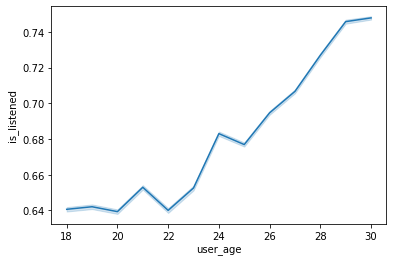

In [56]:
sns.lineplot(x="user_age", y="is_listened", data=df)
plt.show()

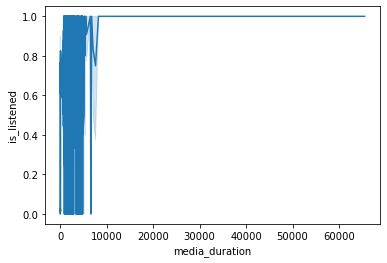

In [57]:
sns.lineplot(x="media_duration", y="is_listened", data=df)
plt.show()

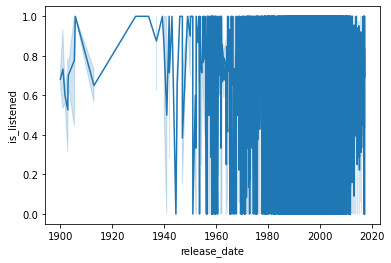

In [58]:
sns.lineplot(x="release_date", y="is_listened", data=df)
plt.show()

## Linear Regression

In [9]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [10]:
df.columns

Index(['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
       'release_date', 'platform_name', 'platform_family', 'media_duration',
       'listen_type', 'user_gender', 'user_id', 'artist_id', 'user_age',
       'is_listened'],
      dtype='object')

In [20]:
model = smf.ols(formula= "is_listened ~ C(genre_id) + C(user_gender) + user_age + I(user_age)^2 + C(context_type) + C(platform_name)",
                data=df.sample(frac=0.01)).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            is_listened   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     6.469
Date:                Sun, 07 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:05:28   Log-Likelihood:                -46274.
No. Observations:               75586   AIC:                         9.448e+04
Df Residuals:                   74622   BIC:                         1.034e+05
Df Model:                         963                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4774      0.011     42.848      0.000       0.456       0.499
C(genre_id)[T.1]         -0.0154      0.022     -0.690      0.490      -0.059       0.028
C(genre_id)[T.2]          0.0174      0.031      0.561      0.575      -0.043       0.078
C(genre_id)[T.3]         -0.0056      0.017     -0.332      0.740      -0.039       0.028
C(genre_id)[T.4]         -0.7651      0.449     -1.703      0.089      -1.646       0.115
C(genre_id)[T.5]          0.2275      0.449      0.506      0.613      -0.653       1.108
C(genre_id)[T.7]         -0.0233      0.005     -4.353      0.000      -0.034      -0.013
C(genre_id)[T.8]         -0.0358      0.225     -0.159      0.874      -0.476       0.405
C(genre_id)[T.9]          0.0884      0.020      4.455      0.000       0.049       0.127
C(genre_id)[T.10]         0.0086      0.009      0.975      0.330      -0.009       0.026
C(genre_id)[T.11]        -0.0806      0.183     -0.439      0.661      -0.440       0.279
C(genre_id)[T.13]        -0.0047      0.042     -0.112      0.911      -0.087       0.077
C(genre_id)[T.14]        -0.0819      0.011     -7.302      0.000      -0.104      -0.060
C(genre_id)[T.15]         0.3946      0.259      1.521      0.128      -0.114       0.903
C(genre_id)[T.16]        -0.0255      0.070     -0.363      0.716      -0.163       0.112
C(genre_id)[T.17]        -0.0347      0.032     -1.088      0.277      -0.097       0.028
C(genre_id)[T.18]         0.0043      0.018      0.241      0.809      -0.030       0.039
C(genre_id)[T.19]         0.0567      0.053      1.077      0.281      -0.046       0.160
C(genre_id)[T.20]         0.1307      0.080      1.644      0.100      -0.025       0.287
C(genre_id)[T.23]        -0.1291      0.040     -3.218      0.001      -0.208      -0.050
C(genre_id)[T.24]         0.0268      0.082      0.326      0.744      -0.134       0.188
C(genre_id)[T.25]         0.0361      0.009      3.944      0.000       0.018       0.054
C(genre_id)[T.27]        -0.0568      0.011     -5.214      0.000      -0.078      -0.035
C(genre_id)[T.30]        -0.0002      0.183     -0.001      0.999      -0.360       0.359
C(genre_id)[T.31]        -0.0347      0.060     -0.578      0.563      -0.153       0.083
C(genre_id)[T.32]         0.3034      0.259      1.170      0.242      -0.205       0.812
C(genre_id)[T.33]         0.0522      0.116      0.450      0.653      -0.175       0.280
C(genre_id)[T.35]        -0.0316      0.259     -0.122      0.903      -0.540       0.477
C(genre_id)[T.42]        -0.4182      0.259     -1.612      0.107      -0.927       0.090
C(genre_id)[T.50]        -0.0596      0.017     -3.585      0.000      -0.092      -0.027
C(genre_id)[T.64]        -0.0087      0.081     -0.108      0.914      -0.167       0.150
C(genre_id)[T.67]      

In [12]:
# ['genre_id', 'ts_listen', 'media_id', 'album_id', 'context_type',
# 'release_date', 'platform_name', 'platform_family', 'media_duration',
# 'listen_type', 'user_gender', 'user_id', 'artist_id', 'user_age',
# 'is_listened']

## Log-Lin Regression

In [13]:
## Logarithmic Regression

# Issues
* Many categorial variable with categories with very few observations -> heavy to analyse and model
* 